---
一元 $n$ 次多项式回归的数学模型可以表达为
$$y=\beta_0+\beta_1x+\cdots+\beta_nx^n+\varepsilon$$

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

#### 1. 一元二次多项式（两组样本）

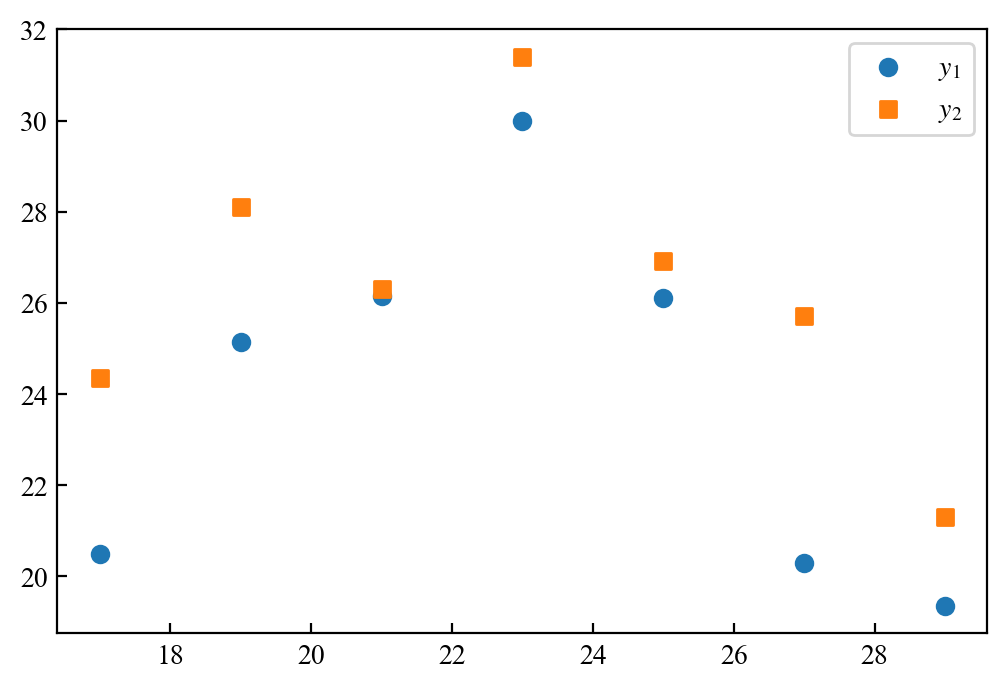

In [2]:
data = np.loadtxt('../../10第10章  回归分析/data10_3.txt')
x = np.arange(17, 30, 2)

fig, ax = plt.subplots()
ax.scatter(x, data[0], label='$y_1$', marker='o')
ax.scatter(x, data[1], label='$y_2$', marker='s')
ax.legend()
fig.show()

In [3]:
xx = np.hstack([x, x])
mod_dic = {'x': xx, 'y': data.flatten()}
mod = smf.ols('y~x+I(x**2)', mod_dic).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     12.71
Date:                Sun, 21 Aug 2022   Prob (F-statistic):            0.00138
Time:                        15:33:30   Log-Likelihood:                -29.060
No. Observations:                  14   AIC:                             64.12
Df Residuals:                      11   BIC:                             66.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.2150     21.794     -3.313      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 2. 多元二次多项式

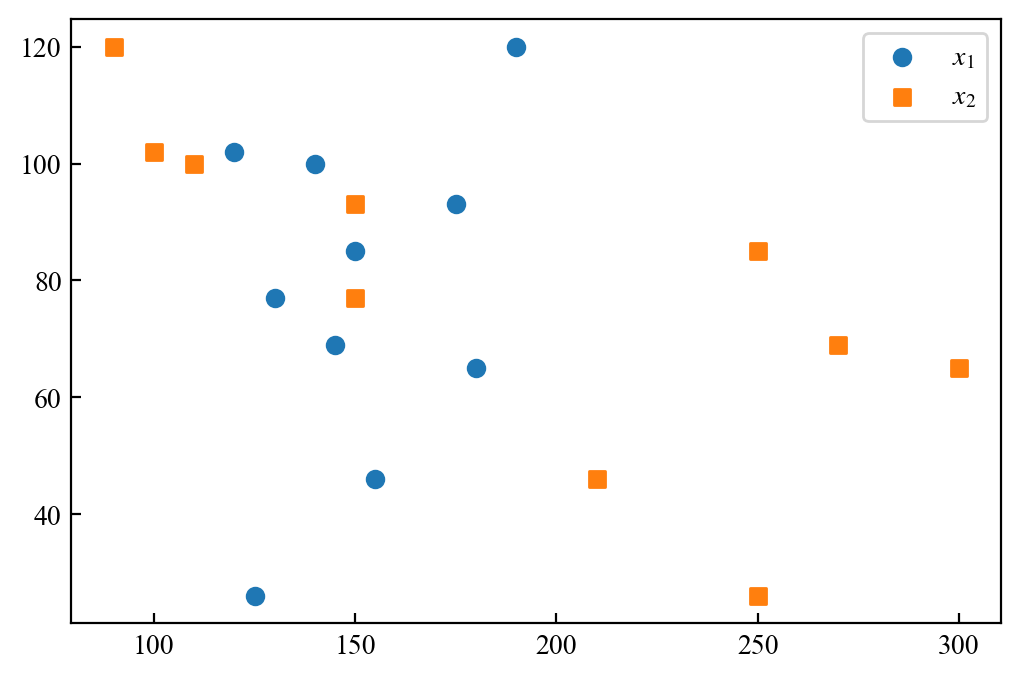

In [4]:
data = np.loadtxt('../../10第10章  回归分析/data10_4.txt')
x1, x2, y = data

fig, ax = plt.subplots()
ax.scatter(x1, y, marker='o', label='$x_1$')
ax.scatter(x2, y, marker='s', label='$x_2$')
ax.legend()
fig.show()

- 线性：　$y=a_0+a_1x_1+a_2x_2$

- 纯二次： $y=b_0+b_1x_1+b_2x_2+b_3x_1^2+b_4x_2^2$

- 交叉二次： $y=c_0+c_1x_1+c_2x_2+c_3x_1x_2$

- 完全二次：$y=d_0+d_1x_1+d_2x_2+d_3x_1x_2+d_4x_1^2+d_5x_2^2$

分别建模，选择残差方差最小的模型

In [5]:
mod_dic = {'x1': x1, 'x2': x2, 'y': y}
mod_linear = smf.ols('y~x1+x2', mod_dic).fit()
print("线性回归的残差方差：", mod_linear.mse_resid)
mod_pure_suqare = smf.ols('y~x1+x2+I(x1**2)+I(x2**2)', mod_dic).fit()
print("纯二次的残差方差：", mod_pure_suqare.mse_resid)
mod_cross_square = smf.ols('y~x1*x2', mod_dic).fit()
print("交叉二次的残差方差：", mod_cross_square.mse_resid)
mod_perfect_square = smf.ols('y~x1*x2+I(x1**2)+I(x2**2)', mod_dic).fit()
print("完全二次的残差方差：", mod_perfect_square.mse_resid)

线性回归的残差方差： 351.04449254103645
纯二次的残差方差： 277.0105410099911
交叉二次的残差方差： 367.2052834323678
完全二次的残差方差： 346.1996046672534


纯二次的残差方差最小

In [6]:
print("预测值:", mod_pure_suqare.predict({'x1': 170, 'x2': 160})[0])

预测值: 82.05228308421192


#### 3.1 多元线性回归

In [7]:
import pandas as pd
from scipy.stats import t, f

df = pd.read_excel('../../10第10章  回归分析/data10_5.xlsx', header=None)
data = df.values
data = np.vstack([data[:, :5], data[:-1, 5:]])
ind, y, x1, x2, x3 = data.T
mod_dic = {'x1': x1, 'x2': x2, 'x3': x3, 'y': y}
mod_linear = smf.ols('y~x1+x2+x3', mod_dic).fit()
print(mod_linear.summary())
print("\n回归系数：\n", mod_linear.params, sep='')
print("\n残差方差：", mod_linear.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     37.75
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.22e-08
Time:                        15:33:31   Log-Likelihood:                -13.871
No. Observations:                  25   AIC:                             35.74
Df Residuals:                      21   BIC:                             40.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8539      1.372      0.622      0.5

#### 3.2 回归系数检验

In [8]:
# F分布
k = len(y)
r = 3
fa = f.ppf(0.95, r, k-r-1)
fa

3.072466986396876

程序求得统计量 $F=37.75>F_{0.05}(3, 21)=3.0725$，故拒绝假设 $H_0:c_j=0,\ j=1,2,3$，模型整体通过了检验

In [9]:
# t分布
ta = t.ppf(0.975, k-r-1)
ta

2.079613844727662

程序求得统计量 
$$t_0=0.622,\ t_1=0.609,\ t_2=7.741,\ t_3=3.806$$
接受 $H_0^{(j)}:c_j=0,\ j=0,1$，拒绝 $H_0^{(j)}:c_j=0,\ j=2,3$，即变量 $x_1$ 对模型的影响是不显著的，建立模型时，可以不使用 $x_1$

In [10]:
mod_dic = {'x2': x2, 'x3': x3, 'y': y}
mod_linear = smf.ols('y~x2+x3', mod_dic).fit()
print(mod_linear.summary())
print("\n回归系数：\n", mod_linear.params, sep='')
print("\n残差方差：", mod_linear.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     58.09
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.67e-09
Time:                        15:33:31   Log-Likelihood:                -14.090
No. Observations:                  25   AIC:                             34.18
Df Residuals:                      22   BIC:                             37.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1077      1.288      0.860      0.3

#### 3.3 完全二次式回归模型

In [11]:
mod_dic = {'x1': x1, 'x2': x2, 'x3': x3, 'y': y}
form = 'y~x1*x2 + x1*x3 + x2*x3 + I(x1**2) + I(x2**2) + I(x3**2)'
mod_pure_suqare = smf.ols(form, mod_dic).fit()
print(mod_pure_suqare.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     17.19
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.31e-06
Time:                        15:33:31   Log-Likelihood:                -6.7346
No. Observations:                  25   AIC:                             33.47
Df Residuals:                      15   BIC:                             45.66
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0988     18.162     -0.941      0.3